In [1]:
using Revise

using Amaru

In [2]:
# Mesh generation
blocks = [
    Block2D( [0 0; 3 0.4], nx=30, ny=8, shape=QUAD8),
]

msh = Mesh(blocks, verbose=true);

Mesh generation:
  analyzing 1 block(s)
  2D mesh             
    797 points obtained
    240 cells obtained
     76 faces obtained
     76 surface edges obtained
  done.


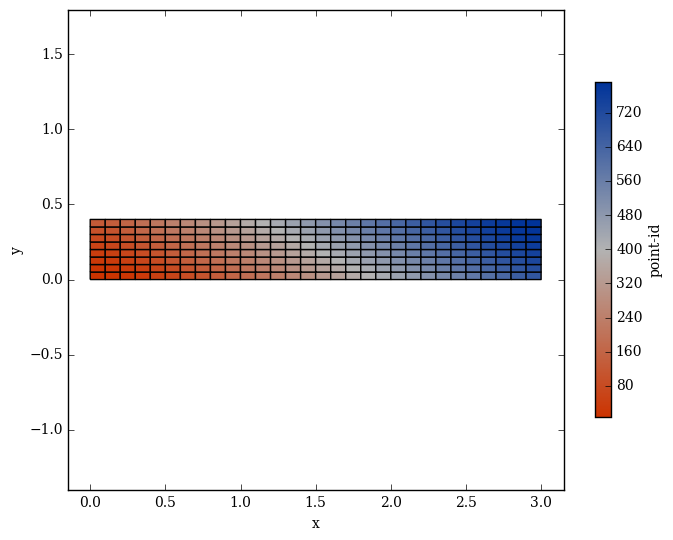

In [3]:
Amaru.mplot(msh, field="point-id")

In [4]:
# Finite element modeling

materials = [
    MaterialBind(:solids, ElasticSolid(E=100.0, nu=0.2) ),
]

loggers = [
    Logger(:node, :(x==1.5 && y==0)) # log node that match condition
    GroupLogger(:ips, :(y<0.025)) # log a group of IPs that match condition
];


In [5]:
# Finite element domain
domain = Domain(msh, materials, loggers, model_type=:plane_stress);

# List of boundary conditions
bcs = [
    BC(:node, :(x==0 && y==0), :(ux=0, uy=0) ),
    BC(:node, :(x==3 && y==0), :(uy=0) ),
    BC(:face, :(y==0.4), :(ty=-0.1*x) ),
]

# Perform the finite element analysis
solve!(domain, bcs, nincs=10, verbose=true)

save(domain, "dom1.vtk")

Domain setup:
  2D domain plane_stress model      
    797 nodes
    240 elements
     76 edges
      1 materials
      2 loggers
  done.
FEM analysis:
  unknown dofs: 1591
  increment 1 from t=0.0 to t=0.1 (dt=0.1):
    it 1   residue: 1.0482e-14
  increment 2 from t=0.1 to t=0.2 (dt=0.1):
    it 1   residue: 1.0482e-14
  increment 3 from t=0.2 to t=0.3 (dt=0.1):
    it 1   residue: 1.0482e-14
  increment 4 from t=0.3 to t=0.4 (dt=0.1):
    it 1   residue: 1.0482e-14
  increment 5 from t=0.4 to t=0.5 (dt=0.1):
    it 1   residue: 1.0482e-14
  increment 6 from t=0.5 to t=0.6 (dt=0.1):
    it 1   residue: 1.0482e-14
  increment 7 from t=0.6 to t=0.7 (dt=0.1):
    it 1   residue: 1.0482e-14
  increment 8 from t=0.7 to t=0.8 (dt=0.1):
    it 1   residue: 1.0482e-14
  increment 9 from t=0.8 to t=0.9 (dt=0.1):
    it 1   residue: 1.0482e-14
  increment 10 from t=0.9 to t=1.0 (dt=0.1):
    it 1   residue: 1.0482e-14
  time spent: 0.0h 0.0m 3.005s
  file dom1.vtk written (Domain)


In [6]:
loggers[1].table

Amaru.DTable with:
  data: Array{Array{Float64,1},1}, length 7
  dict: Dict{Symbol,Array{Float64,1}}

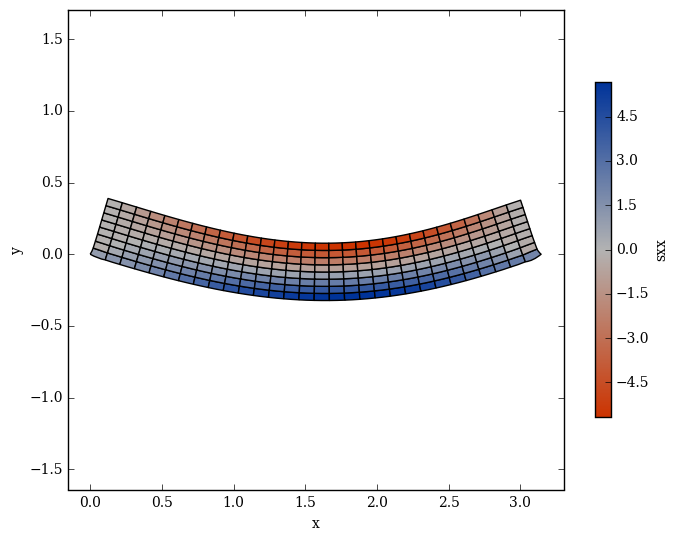

In [7]:
Amaru.mplot(domain, field="sxx", warpscale=1)

In [8]:
node_data = loggers[1].table

Amaru.DTable with:
  data: Array{Array{Float64,1},1}, length 7
  dict: Dict{Symbol,Array{Float64,1}}

In [9]:
using PyPlot
rc("font", family="serif", size=10)

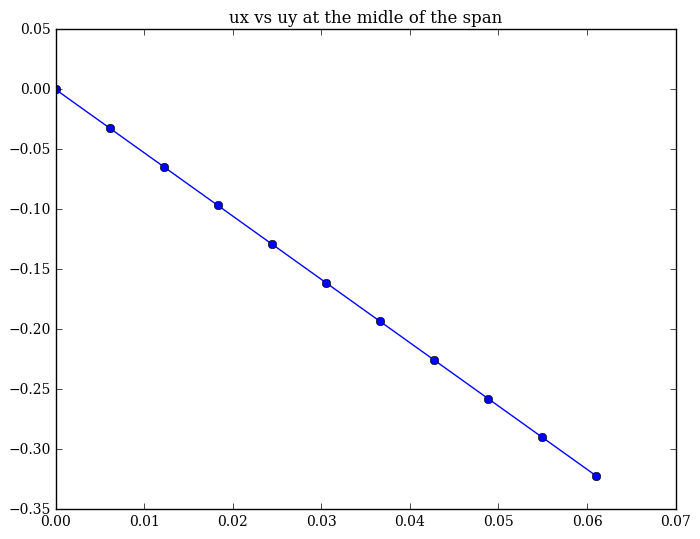

PyObject <matplotlib.text.Text object at 0x7fa2aee43dd0>

In [10]:
plot(node_data[:ux], node_data[:uy], "o-")
title("ux vs uy at the midle of the span")

In [11]:
ips_data = loggers[2].book
#save(loggers[2].book, "book.dat")

Amaru.DBook with:
  tables: Array{Amaru.DTable,1}, length 11

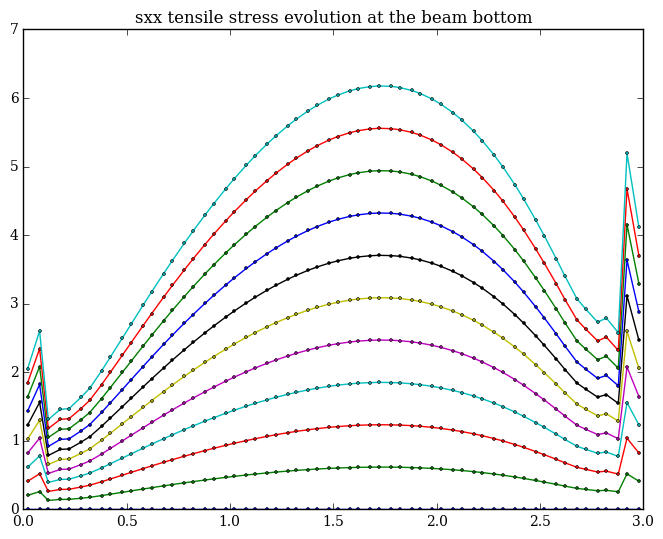

PyObject <matplotlib.text.Text object at 0x7fa2aefd8810>

In [12]:
for table in ips_data.tables
    plot(table[:x], table[:sxx], "o-", ms=2);
end
title("sxx tensile stress evolution at the beam bottom")